# Differentiation and Integration

## Motivation

Differentiation and Integration allow understanding change in physical systems. Any magnitude that changes and which we need to calculate will require some of the tools of calculus. 

In real systems, we will very often find that the governing equations are either a) too hard or impossible to differentiate or integrate analytically, or b) unknown. Therefore, we will need to apply numerical approximations to estimate the value of differentials and integrals. Integrals can be used, for example, to estimate the volume of irregular objects.



# Numerical integration

Common sense visual integration: divide in strips, then sum the area of the strips. The most basic numerical methods to approximate integrals are reminiscent of this basic approach: _cuadrature_ methods.

As an example, let's integrate graphically the (initially) unknown function from practice 4:


|f, mg/l|k, $days^{-1}$|
|----|------|
|7   | 0.29 |
|9   | 0.37 |
|15  | 0.48 |
|25  | 0.65 |
|40  | 0.80 |
|75  | 0.97 |
|100 | 0.99 |
|150 | 1.07 |


## Newton-Cotes Integration Formulas

Based on replacing a complicated function or tabulated data with an easier to integrate function.

## Trapezoidal Rule

Replacing with a linear function:

$$I = (b-a)\frac{f(a)+ f(b)}{2}$$

#### Exercise

Compute, both analytically and using the trapezoidal rule, the integral:

$$\int_0^{0.8}(0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5)dx$$

In [1]:
a = 0
b = 0.8

def analytical(x):
    return .2*x + (25 / 2) * x**2 - (200/3)*x**3 + (675/4)* x**4 - (900/5)*x**5 + (400/6)*x**6

def f(x):
     return .2 + (25) * x - (200)*x**2 + (675)* x**3 - (900)*x**4 + (400)*x**5

(b-a)*(f(a) + f(b)) /2, analytical(b) - analytical(a)

(0.1728000000000225, 1.6405333333333374)

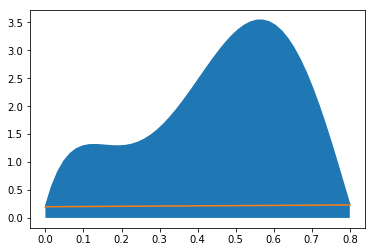

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.linspace(a, b)
plt.plot(xs, f(xs))
plt.fill_between(xs, f(xs))
plt.plot([a,b], [f(a), f(b)])

### Multiple application trapezoidal rule

Just consider multiple segments

#### Example

The falling parachutist: remember that our parachutist falls with a velocity that increases with time according to:

$$v(t) = \frac{gm}{c} (1 - e^{-(c/m)t})$$

where v = velocity (m/s), g = the gravitational constant of 9.8 $m/s^2$, m = mass of the parachutist equal to 68.1 kg, and c = the drag coefficient of 12.5 kg/s.

Calculate the distance in meters he has fallen at t=10s.

Perform the calculation with 10,20 and 50 segments.

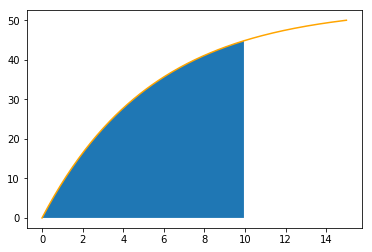

In [3]:
def v_parachutist(t, c=12.5, m=68.1, g=9.8):
    return (g * m) * (1- np.exp((-c/m)*t) ) / c

ts = np.linspace(0,15, num=200)
plt.plot(ts, v_parachutist(ts), c='orange')
plt.fill_between(ts, v_parachutist(ts), where=ts<=10)

In [4]:
def integral_trapezoid(f, a=0, b=10, segments=10):
    space = np.linspace(a, b, num=segments+1)
    total_area = 0

    for b in space[1:]:
        total_area += (b-a)*(f(b) + f(a))/2
        a=b
    
    return total_area

integral_trapezoid(f, 0, 0.8, 5)

1.5398809600000134

289.40655969603625

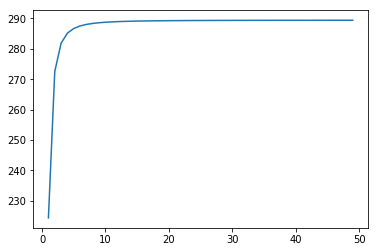

In [5]:
results = []

increasing_segments = np.arange(1, 50)

for n_segments in increasing_segments:
    results.append(integral_trapezoid(v_parachutist, segments=n_segments))
    
plt.plot(increasing_segments, results)
results[-1]

#### Exercise
Approximate the definite integral using the multiple-application trapezoidal rule, dividing
the integration interval into four sections. Compare this approximation with the one obtained in the previous example.

$$\int_0^{0.8}(0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5)dx$$

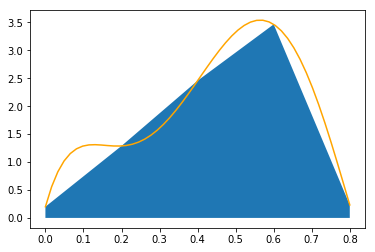

In [6]:
segments = np.linspace(a,b, num=5) # 5 points for 4 segments
plt.plot(xs, f(xs), c='orange')
plt.fill_between(segments, f(segments))

In [7]:
a = segments[0]
total_area = 0
for b in segments[1:]:
    area_this_trapezoid = (b-a)*(f(a) + f(b)) /2
    total_area += area_this_trapezoid
    
    a = b
    
total_area, analytical(0.8) - analytical(0)


(1.484800000000007, 1.6405333333333374)

In [8]:
f

<function __main__.f(x)>

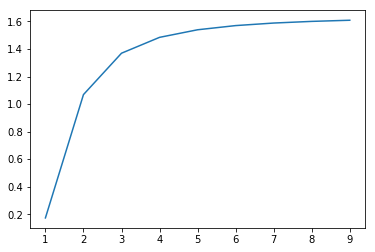

In [9]:
results = []

increasing_segments = np.arange(1, 10)

for n_segments in increasing_segments:
    results.append(integral_trapezoid(f, a=0, b=0.8, segments=n_segments))
    
plt.plot(increasing_segments, results);

## Simpson's Rules

A higher accuracy can be obtained by fitting functions with order higher than 1.

### The 1/3 Simpon's rule

$$\int_a^b f(x)dx \approx \int_a^b f_2(x)dx \approx \frac{b-a}{6}[f(x_0) + 4f(x_1) +f(x_2)]$$

It can also be applied multiple times to get a higer accuracy approximation

#### Exercise

Use the 1/3 Simpson’s rule to compute the following integral numerically:

$$\int_0^{0.8}(0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5)dx$$

In [10]:
a = 0
b = 0.8

x0 = a
x1 = (a+b)/2
x2 = b


approx = ((b-a)/6) *(f(x0) + 4*f(x1) +f(x2))

approx

1.3674666666666742

## Numerical Integration in Python

In [13]:
from scipy import integrate

help(integrate.quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the 

In [15]:
integrate.quad(f, 0, 0.8)

(1.6405333333333307, 1.8213578793317207e-14)

In [17]:
integrate.quad(v_parachutist, 0, 10)

(289.43514651129396, 3.213375637925941e-12)

# Numerical differentiation

Based on the limit definition of the derivative:

$$f'(x_0) \approx \frac{f(x_0 + \delta) - f(x_0)}{\delta} $$


$$f''(x_0) \approx \frac{f(x_0 + 2\delta) - 2f(x_0 + \delta) + f(x_0)}{\delta^2} $$

### Example

Compute the first and second
derivatives of the following function, at $x_0 = 0.5$, both analytically and approximately. For the approximation, use step sizes $h = 0.25$ and
$h = 0.025$.

$$f(x) = -0.1x^4 - 0.15 x^3 - 0.5x^2 - 0.25x + 1.2$$

In [20]:
def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

# Analytical
def fprime(x):
    return -0.4*x**3 - 0.45*x**2 - x - 0.25

def fprimeprime(x):
    return -1.2*x**2 - 0.90*x - 1

x_0 = .5
f(x_0), fprime(x_0), fprimeprime(x_0)

(0.9249999999999999, -0.9125, -1.75)

$$f'(x_0) \approx \frac{f(x_0 + \delta) - f(x_0)}{\delta} $$


$$f''(x_0) \approx \frac{f(x_0 + 2\delta) - 2f(x_0 + \delta) + f(x_0)}{\delta^2} $$

In [29]:
# Numerical
def first(f, x_0=.5, h=.25):
    return (f(x_0 + h) - f(x_0)) / h

def second(f, x_0=.5, h=.25):
    return (f(x_0 + 2*h) - 2 * f(x_0 + h) + f(x_0)) / h**2

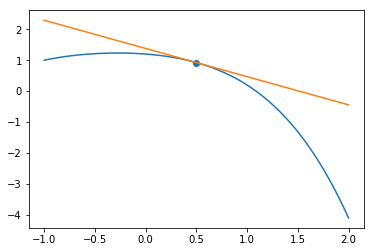

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the tangent of f at x_0
a = fprime(x_0)
b = f(x_0) - fprime(x_0)* x_0
tangent_ys = a * xs + b

# Plot both f and the tangent
xs = np.linspace(-1, 2)
plt.plot(xs, f(xs))
plt.plot(xs, tangent_ys)
plt.scatter(x_0, f(x_0));

[-2.2375000000000003,
 -1.45,
 -1.1546875,
 -1.003599999999999,
 -0.9571375000000004,
 -0.9345953125000017,
 -0.9212850999999911,
 -0.9125875034998732]

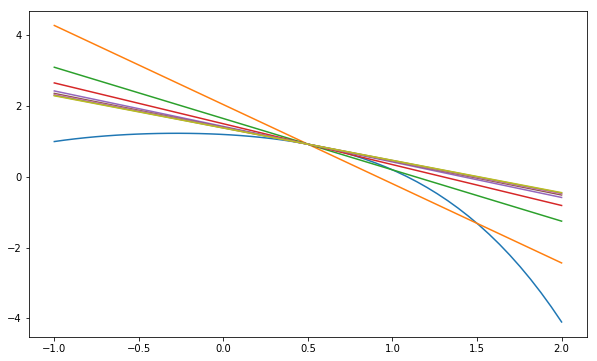

In [41]:
hs = [1, .5, .25, .1, .05, .025, .01, 0.0001]
plt.plot(xs, f(xs))
derivatives = []

for h in hs:
    derivative = first(f, h=h, x_0=x_0)
    b = f(x_0) - derivative * x_0
    plt.plot(xs, derivative * xs + b)
    derivatives.append(derivative)

plt.gcf().set_size_inches(10,6)
derivatives

## Numerical Differentiation in Python



In [45]:
np.diff(f(xs))

array([ 0.04047663,  0.03592823,  0.0316735 ,  0.0276787 ,  0.02391012,
        0.02033404,  0.01691673,  0.01362448,  0.01042355,  0.00728023,
        0.0041608 ,  0.00103154, -0.00214129, -0.00539139, -0.0087525 ,
       -0.01225832, -0.0159426 , -0.01983904, -0.02398137, -0.0284033 ,
       -0.03313858, -0.0382209 , -0.04368401, -0.04956161, -0.05588743,
       -0.06269519, -0.07001862, -0.07789143, -0.08634735, -0.0954201 ,
       -0.1051434 , -0.11555098, -0.12667655, -0.13855384, -0.15121656,
       -0.16469845, -0.17903322, -0.1942546 , -0.2103963 , -0.22749205,
       -0.24557557, -0.26468058, -0.28484081, -0.30608998, -0.3284618 ,
       -0.35199   , -0.3767083 , -0.40265043, -0.4298501 ])

`np.diff` returns an array of size n-1. We may want to use `np.gradient` instead.

In [47]:
np.gradient?

Signature: np.gradient(f, *varargs, **kwargs)
Docstring:
Return the gradient of an N-dimensional array.

The gradient is computed using second order accurate central differences
in the interior points and either first or second order accurate one-sides
(forward or backwards) differences at the boundaries.
The returned gradient hence has the same shape as the input array.

Parameters
----------
f : array_like
    An N-dimensional array containing samples of a scalar function.
varargs : list of scalar or array, optional
    Spacing between f values. Default unitary spacing for all dimensions.
    Spacing can be specified using:

    1. single scalar to specify a sample distance for all dimensions.
    2. N scalars to specify a constant sample distance for each dimension.
       i.e. `dx`, `dy`, `dz`, ...
    3. N arrays to specify the coordinates of the values along each
       dimension of F. The length of the array must match the size of
       the corresponding dimension
    4. Any co

In [48]:
np.gradient(f(xs))

array([ 0.04047663,  0.03820243,  0.03380086,  0.0296761 ,  0.02579441,
        0.02212208,  0.01862539,  0.01527061,  0.01202401,  0.00885189,
        0.00572052,  0.00259617, -0.00055488, -0.00376634, -0.00707194,
       -0.01050541, -0.01410046, -0.01789082, -0.0219102 , -0.02619234,
       -0.03077094, -0.03567974, -0.04095245, -0.04662281, -0.05272452,
       -0.05929131, -0.0663569 , -0.07395502, -0.08211939, -0.09088373,
       -0.10028175, -0.11034719, -0.12111376, -0.13261519, -0.1448852 ,
       -0.15795751, -0.17186584, -0.18664391, -0.20232545, -0.21894418,
       -0.23653381, -0.25512808, -0.2747607 , -0.29546539, -0.31727589,
       -0.3402259 , -0.36434915, -0.38967937, -0.41625027, -0.4298501 ])

# Problems

#### Exercise

The depths of a river H are measured at equally spaced distances across a channel as tabulated below. The river’s crosssectional area can be determined by integration as in

$$ \int_0^xH(x)dx$$

```
x, m |  0  2    4  6  8    10   12    14    16
H, m |  0  1.9  2  2  2.4  2.6  2.25  1.12  0
```

Determine the cross-sectional area, both by the trapezoidal rule and by the 1/3 Simpson's rule.

Optional: fit cubic splines to the points, and then calculate the area under that curve with multiple application.

#### Exercise
The normal distribution is governed by the equation

$$N(x) = \int_{-\infty}^x\frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx$$

where $x=(y-\bar{y})/s_y$

Write a function to calculate the probabilty of an event being less than y, for a distribution that by default will be centered at 0 and with a standard deviation of 1.

For the purposes of this exercise, simply take -10 as left value.